## This notebook is used to generate label for Udacity Labeled data to fit darknet training format

In [13]:
import pickle
import os
from os import listdir, getcwd
from os.path import join

import csv
import pickle
import numpy as np
from sklearn.utils import shuffle

In [14]:
def train_val_split(data):
    key = list(data.keys())
    shuffle_key = shuffle(key, random_state=0)
    train = shuffle_key[:int(len(shuffle_key)*0.9)]
    val = shuffle_key[int(len(shuffle_key)*0.9):]
    train_data = {}
    for key in train:
        train_data[key] = data[key]
    val_data = {}
    for key in val:
        val_data[key] = data[key]
    return train_data, val_data

def convert_annotation(prefix, image_id, data):
    out_file = open('%s/%s.txt'%(prefix, image_id), 'w')
    w = 1920
    h = 1200

    for obj in data[image_id]:
        cls_id = obj[-1]
        b = (obj[0],obj[2],obj[1],obj[3])
#         print(b)
        bb = convert((w,h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')

def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def parse(prefix, data):
    train_data, val_data = train_val_split(data)
    
    wd = getcwd()
    
#     train_data
    list_file = open('train_%s.txt'%(prefix), 'w')
    for image_id in train_data:
        list_file.write('%s/%s/%s.jpg\n'%(wd, prefix, image_id))
        convert_annotation(prefix, image_id, train_data)
    list_file.close()
#     val_data
    list_file = open('val_%s.txt'%(prefix), 'w')
    for image_id in val_data:
        list_file.write('%s/%s/%s.jpg\n'%(wd, prefix, image_id))
        convert_annotation(prefix, image_id, val_data)
    list_file.close()


In [15]:
class_names = ["car", "truck"]

size = []

prefix = "object-dataset"
data = {}
with open(prefix+"/labels.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter = " ")
    for row in reader:
        label = row[-1].lower()
        if(label in class_names):
            img_id = row[0].split(".")[0]
            label_id = class_names.index(label)
            if(label_id > 0): label_id = label_id - 1 # combine truck with car
            box = [0 for i in range(5)] # xmin, ymin, xmax, ymax, label
            box[:4] = row[1:5]
            box[-1] = label_id
            box = np.array(box, dtype=np.int32)
            if(box[-1] == 0):
                size.append((box[2]-box[0])*(box[3]-box[1]))
            if((box[2]-box[0])*(box[3]-box[1]) > 6000):
                if(img_id not in data):
                    data[img_id] = [box]
                else:
                    data[img_id].append(box)

label_count = [0,0,0] # verify it reads correctly
for img in data:
    for obj in data[img]:
        label_count[obj[-1]] += 1
print(prefix, "car: ",label_count[0],"pedestrian: ",label_count[1])

parse(prefix, data)


object-dataset car:  44294 pedestrian:  0


In [16]:
class_names = ["car", "truck"]

prefix = "object-detection-crowdai"
data = {}

with open(prefix+"/labels.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter = ",")
    for row in reader:
        label = row[-2].lower()
        if(label in class_names):
            img_id = row[4].split(".")[0]
            label_id = class_names.index(label)
            if(label_id > 0): label_id = label_id - 1 # combine truck with car
            box = [0 for i in range(5)] # xmin, ymin, xmax, ymax, label
            box[:4] = row[0:4]
            box[-1] = label_id
            box = np.array(box, dtype=np.int32)
            if(box[-1] == 0):
                size.append((box[2]-box[0])*(box[3]-box[1]))
            if((box[2]-box[0])*(box[3]-box[1]) > 6000):
                if(img_id not in data):
                    data[img_id] = [box]
                else:
                    data[img_id].append(box)

label_count = [0,0,0] # verify it reads correctly
for img in data:
    for obj in data[img]:
        label_count[obj[-1]] += 1
print(prefix, "car: ",label_count[0],"pedestrian: ",label_count[1])

parse(prefix, data)

object-detection-crowdai car:  34962 pedestrian:  0


51384


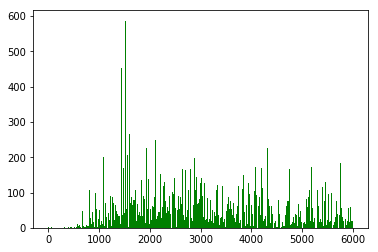

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

size_filter = [l for l in size if(l < 6000)]
print(len(size_filter))
n, bins, patches = plt.hist(size_filter, 1000,  facecolor='green')

plt.show()